## 10.2 Group Anagrams
<div class="alert alert-block alert-success">
Given an array of strings, group anagrams together.

Example:

Input: ["eat", "tea", "tan", "ate", "nat", "bat"],
Output:
[
  ["ate","eat","tea"],
  ["nat","tan"],
  ["bat"]
]
</div>
How do you check if two words are anagrams of each other? Think about what the defi- nition of "anagram" is. Explain it in your own words. Two words are anagrams if they contain the same characters but in different orders. How can you put characters in order? Can you leverage a standard sorting algorithm? Do you even need to truly "sort"? Or is just reorganizing the list sufficient?

In [ ]:
def groupAnagram(strings):
    pairs = [(s,sorted(s)) for s in strings]
    pairs.sort(key = lambda p : p[1])
    return [ p[0] for p in pairs]

import collections
def groupAnagram1(strs):
    d = collections.defaultdict(list)
    for s in strs:
        d[tuple(sorted(s))].append(s)  
    return list(d.values())

strings = ["cat", "bat", "rat", "arts", "tab", "tar", "car", "star"]
print(groupAnagram1(strings))

## 217. Contains Duplicate
<div class="alert alert-block alert-success">
Given an array of integers, find if the array contains any duplicates.
Example 1:

Input: [1,2,3,1]
Output: true
</div>
## 219. Contains Duplicate II
<div class="alert alert-block alert-success">
Given an array of integers and an integer k, find out whether there are two distinct indices i and j in the array such that nums[i] = nums[j] and the absolute difference between i and j is at most k.
Example 1:

Input: nums = [1,2,3,1], k = 3
Output: true
</div>
## 287. Find the Duplicate Number
<div class="alert alert-block alert-success">
Given an array nums containing n + 1 integers where each integer is between 1 and n (inclusive). You must use only constant, O(1) extra space.
Example 1:

Input: [1,3,4,2,2]
Output: 2
</div>
**Approach 1** Binary search: At first the search space is numbers between 1 to n. Each time I select a number mid (which is the one in the middle) and count all the numbers equal to or less than mid. Then if the count is more than mid, the search space will be [1 mid] otherwise [mid+1 n]. I do this until search space is only one number.

**Approach 2** 

In [ ]:
def containsDuplicate(nums):
    return len(nums) != len(set(nums))

def containsNearbyDuplicate(nums,k):
    dict = {}
    for i in range(len(nums)):
        if nums[i] in dict and i - dict[nums[i]] <= k:
            return True
        dict[nums[i]] = i
    return False

# Binary search, O(nlogn) time
def findDuplicate(nums):
    low, high = 1,len(nums)-1
    while low <= high:
        mid = low + (high -low)//2
        cnt = len([num for num in nums if num <= mid ])
        if cnt <= mid :
            low = mid +1
        else:
            high = mid -1
    return low
print(containsDuplicate([1,2,3,1]))
print(containsNearbyDuplicate([1,2,3,1],3))
print(findDuplicate ([1,2,3,1]))

## 1. Two Sum
<div class="alert alert-block alert-success">
Given an array of integers, return indices of the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

Example:

Given nums = [2, 7, 11, 15], target = 9
</div>
**Approach 1** Brute Force . O(n^2) time
**Approach 2** 02 pass, hashtable. We reduce the look up time from O(n) to O(1) by trading space for speed.
**Approach 2** 01 pass : While we iterate and inserting elements into the table, we also look back to check if current element's complement already exists in the table. If it exists, we have found a solution and return immediately.



In [ ]:
def twoSum(nums,target):
    dict = {}
    for i in range(len(nums)):
        if target - nums[i] in dict:
            return [i,dict[target - nums[i]]]
        dict[nums[i]] = i
print(twoSum([2, 7, 11, 15],9))

## 10.3 Search in Rotated Sorted Array
<div class="alert alert-block alert-success">
Suppose an array sorted in ascending order is rotated at some pivot unknown to you beforehand.

(i.e., [0,1,2,4,5,6,7] might become [4,5,6,7,0,1,2]).

You are given a target value to search. If found in the array return its index, otherwise return -1.

You may assume no duplicate exists in the array.

Your algorithm's runtime complexity must be in the order of O(log n).

Example 1:

Input: nums = [4,5,6,7,0,1,2], target = 0
Output: 4


</div>

## 153. Find Minimum in Rotated Sorted Array

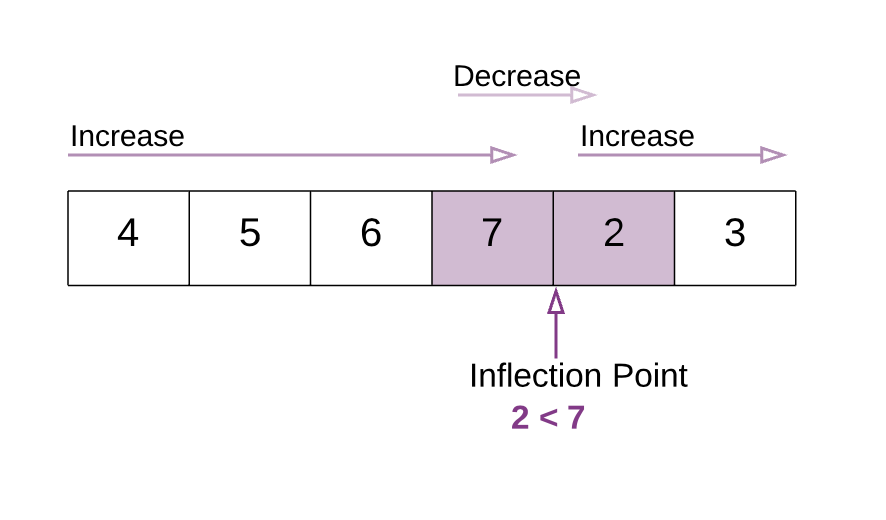

## 81. Search in Rotated Sorted Array II
<div class="alert alert-block alert-success">
This is a follow up problem to Search in Rotated Sorted Array, where nums may contain duplicates
</div>

Because it's not fully sorted, we can't do normal binary search. Can you modify binary search for this purpose?
It's essentially just deciding whether you are on the right side or not.

1. If nums[0] <= nums[i], then nums[0..i] is sorted. So we should keep searching in nums[0..i] if the target lies in this sorted range, i.e., if nums[0] <= target <= nums[i].

1. If nums[i] < nums[0], then nums[0..i] contains a drop, and thus nums[i+1..end] is sorted and lies strictly between nums[i] and nums[0]. So we should keep searching in nums[0..i] if the target doesn't lie strictly between them, i.e., if target <= nums[i] < nums[0] or nums[i] < nums[0] <= target

In [ ]:
def search(nums, target):
    low,high = 0,len(nums)-1

    while low <= high:
        mid = low +(high-low)//2
        if target == nums[mid]:
            return mid
#         while low < mid and nums[low] == nums[mid]: # tricky part for duplicate content
#                 low += 1
        if nums[low] <= nums[mid]: # [low..mid]is sorted
            if nums[low] <= target <= nums[mid]:
                high = mid-1
            else:
                low = mid+1
        else: #[low .. mid] contain a drop
            if nums[mid] <= target <= nums[high]: # [mid..high] is sorted
                low = mid+1
            else:
                high = mid -1
    return -1


def findMin(self, nums):
    left,right = 0, len(nums)-1
    while left < right:
        mid = left + (right-left)//2
        if nums[mid] < nums[right]: # right side in sorted order, the min is in the left side
            right = mid
        else: # the min is in the right side
            left = mid+1
    return nums[left]


print(search([4,5,6,7,0,1,2],0))

## 74. Search a 2D Matrix
<div class="alert alert-block alert-success">
Write an efficient algorithm that searches for a value in an m x n matrix. This matrix has the following properties:

1. Integers in each row are sorted from left to right.
1. The first integer of each row is greater than the last integer of the previous row.

Input:
<br>
matrix = [<br>
  [1,   3,  5,  7],<br>
  [10, 11, 16, 20],<br>
  [23, 30, 34, 50]<br>
]<br>
target = 3

Output: true
</div>
**Approach 1** binary search
1. n * m matrix convert to an array => matrix[x][y] => a[x * m + y]

1. an array convert to n * m matrix => a[x] =>matrix[x / m][x % m];
**Approach 2** Apply binary search for colums first, then for row

In [ ]:
def searchMatrix(matrix, target):
    if not matrix:
        return False

    n,m = len(matrix),len(matrix[0])
    left,right = 0,(m*n)-1

    while left <= right:
        mid = left + (right-left)//2
        x = matrix[mid//m][mid%m]
        if x < target:
            left = mid +1
        elif x > target:
            right = mid -1
        else:
            return True
    return False


def searchMatrix_V2(matrix, target):
    m = bisect.bisect(matrix,[target+0.5])
    if m:
        n = bisect.bisect(matrix[m-1],target)
        return len(matrix[0])>0 and matrix[m-1][n-1] == target
    return False

## 658. Find K Closest Elements
<div class="alert alert-block alert-success">
Given a sorted array, two integers k and x, find the k closest elements to x in the array. The result should also be sorted in ascending order. If there is a tie, the smaller elements are always preferred.

Example 1:
Input: [1,2,3,4,5], k=4, x=3
Output: [1,2,3,4]

</div>
**Approach 1** Time: O(n.lgn + k.lgk),Space: O(n + k)
Sorting by absolute difference and taking the first k elements. This approach does not scale well and only works because the input is small

**Approach 2** Time: O(lgn + k), Space: O(k)
Use binary search to find the value's position in the array, and expand outwards using two pointers. This approach scales the best.



In [ ]:
def findClosestElements(arr, k, x):
    return sorted(sorted(arr,key=lambda val:abs(val-x))[:k])


import bisect
def findClosestElements_v2(arr, k, x):
    # binary search the closet value to x
    index = bisect.bisect_left(arr,x)
    left = index-1
    right = index+1 if arr[index]==x else index
    #expand using two pointer
    while right-left < k+1:
        # expand to the left
        if left>=0 and (right >= len(arr) or abs(arr[left]-x) <= abs(arr[right]-x)):
            left -=1
        else:
            right +=1
    return arr[left+1:right]

print(findClosestElements_v2([1,2,3,4,5],4,3))

## 34. Find First and Last Position of Element in Sorted Array
<div class="alert alert-block alert-success">
Given an array of integers nums sorted in ascending order, find the starting and ending position of a given target value.

Your algorithm's runtime complexity must be in the order of O(log n).

If the target is not found in the array, return [-1, -1].


Input: nums = [5,7,7,8,8,10], target = 8
Output: [3,4]
</div>
The problem can be simply broken down as two binary searches for the begining and end of the range, respectively:

First let's find the left boundary of the range. We initialize the range to [i=0, j=n-1]. In each step, calculate the middle element [mid = (i+j)/2]. Now according to the relative value of A[mid] to target, there are three possibilities:

1. If A[mid] < target, then the range must begins on the right of mid (hence i = mid+1 for the next iteration)
1. If A[mid] > target, it means the range must begins on the left of mid (j = mid-1)
1. If A[mid] = target, then the range must begins on the left of or at mid (j= mid)
Since we would move the search range to the same side for case 2 and 3, we might as well merge them as one single case so that less code is needed:

1. 2*. If A[mid] >= target, j = mid;

In [ ]:
def searchRange(nums, target):
    if not nums:
        return [-1,-1]
    def bisect_left(nums,target):
        left,right = 0,len(nums)-1
        while left < right:
            mid = (left+right)//2
            if nums[mid] < target:
                left = mid +1
            else: # merge 2 case: range must begin on left of or at mid
                right = mid
        return left if nums[left]==target else -1

    def bisect_right(nums,target):
        left,right = 0,len(nums)-1
        while left < right:
            mid = (left+right)//2 +1 # make the mod bias to the right
            if nums[mid] > target: # the range must begin on the left of mid
                right = mid-1
            else: # the range must begin on the right or at mid
                left = mid
        return left if nums[left]==target else -1

    return [bisect_left(nums,target),bisect_right(nums,target)]

print(searchRange([5,7,7,8,8,10],8))